# Module 5:  Haar Object Detection and Viola-Jones Face Detection
****

#### Haar Cascade Object Detection

Haar Cascade is an object detection algorithm used to identify faces, objects, or other patterns in images or videos. This algorithm is based on machine learning techniques (<a href="https://developers.google.com/machine-learning/decision-forests/decision-trees">Decision Trees</a>) and works by analyzing features of an object at various scales and locations within an image. The features that Haar Cascade uses are called Haar-like features, which are simple rectangular features that describe a particular area of an image. These features can be combined to create a classifier that can identify objects within an image.

The Haar Cascade algorithm was developed by Viola and Jones in 2001 and has since become one of the most popular object detection algorithms. The algorithm is computationally efficient and can run in real-time on a variety of devices, including mobile phones and embedded systems.

To use the Haar Cascade algorithm for object detection, you first need to train a classifier using positive and negative samples. Positive samples are images that contain the object you want to detect, while negative samples are images that do not contain the object. The classifier is then trained using machine learning techniques to identify the Haar-like features that are most indicative of the object you want to detect.

Once the classifier is trained, it can be used to detect objects in new images or videos. The algorithm works by scanning the image or video with a sliding window of different sizes, and at each position, the classifier is applied to identify whether an object is present or not. The algorithm can then draw a bounding box around the object to indicate its location within the image.



In [ ]:
# Write the Python code for a toy example of a decision tree


#### Viola-Jones Face Detection

Viola-Jones face detection is a specific application of the Haar Cascade algorithm, developed by Viola and Jones in 2001, that is used to detect faces within an image or video. This algorithm uses a combination of Haar-like features and machine learning techniques to identify patterns that are indicative of a face.

The Viola-Jones algorithm works by scanning an image or video with a sliding window of different sizes and applying a pre-trained classifier to identify regions of the image that are most likely to contain a face. The classifier is trained using a dataset of positive and negative samples of faces to identify the Haar-like features that are most indicative of a face.

Once the algorithm has identified regions of the image that are likely to contain a face, it uses a set of cascaded classifiers to refine the detection and reduce false positives. The cascaded classifiers work by progressively filtering out regions of the image that are unlikely to contain a face, based on a set of rules that are determined during training.

The Viola-Jones algorithm has been widely used in various applications, including facial recognition, video surveillance, and augmented reality. However, the algorithm has some limitations, such as its sensitivity to variations in lighting conditions and facial expressions. There have been many improvements to the algorithm since its initial development, including the use of deep learning techniques to improve its accuracy and robustness.

In summary, the Haar Cascade object detection algorithm and the Viola-Jones face detection algorithm are powerful tools for identifying objects and patterns within images and videos. These algorithms use a combination of machine learning techniques and Haar-like features to identify objects and can be applied to a wide range of applications.

Each feature is a single value obtained by subtracting sum of pixels under the white rectangle from sum of pixels under the black rectangle.

<img src="Graphics/haar_features.jpeg"><p>
<img src="Graphics/haar.png">


#### Adaboost (Maybe Remove just talk about Decision Trees)

Adaboost is used as a key component of the algorithm. The goal of the Viola-Jones face detection algorithm is to classify sub-windows of an input image as either containing a face or not containing a face.

The Viola-Jones algorithm uses a type of weak classifier called a Haar-like feature classifier to detect faces. These classifiers are simple rectangular filters that respond to certain patterns of light and dark regions in an image. While each individual Haar-like feature classifier may be weak, a large number of them can be combined using Adaboost to create a strong classifier that can accurately classify faces.

Adaboost is used to select the most discriminative Haar-like feature classifiers from a large pool of possible classifiers. The algorithm works by iteratively training a series of weak classifiers on a set of training images, and adjusting their weights to give greater emphasis to misclassified examples.

In each iteration, the algorithm selects the best performing classifier and adds it to the ensemble of classifiers. The weights of the training examples are then adjusted again to give greater emphasis to the examples that were misclassified by the current ensemble of classifiers.

This process continues until a predetermined number of classifiers has been selected. The final classifier is then constructed by combining the outputs of all the selected weak classifiers, weighted by their accuracy in classification.

By using Adaboost to select the most discriminative Haar-like feature classifiers, the Viola-Jones algorithm is able to create a strong classifier that can accurately detect faces in real-world images with high accuracy and low computational cost.

<a href="https://www.youtube.com/watch?v=hPCTwxF0qf4&t=253s&ab_channel=AnkurDivekar">Viola-Jones in Action</a>

In [9]:
# Let's fine where our pre-trained classifiers are stored

import site
print(site.getsitepackages())

['/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages']


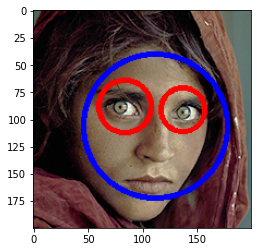

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the face and eyes cascade classifiers
face_cascade = cv2.CascadeClassifier('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cv2/data/haarcascade_eye.xml')

# Load the input image and convert it to grayscale
img = cv2.imread('Graphics/face.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image using the face cascade classifier
faces = face_cascade.detectMultiScale(gray)

# Iterate through all the detected faces and draw ellipses around them
for (x,y,w,h) in faces:
    center = (round(x + w/2), round(y + h/2))  # Calculate the center of the face
    img = cv2.ellipse(img, center, (round(w/2), round(h/2)), 0, 0, 360, (255, 0, 0), 4)  # Draw an ellipse around the face
    faceROI = gray[y:y+h,x:x+w]  # Extract the region of interest corresponding to the face
    # Detect eyes in the face region of interest using the eyes cascade classifier
    eyes = eyes_cascade.detectMultiScale(faceROI)
    # Iterate through all the detected eyes and draw circles around them
    for (x2,y2,w2,h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)  # Calculate the center of the eye
        radius = int(round((w2 + h2)*0.25))  # Calculate the radius of the circle
        img = cv2.circle(img, eye_center, radius, (0, 0, 255 ), 4)  # Draw a circle around the eye

# Display the final image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()




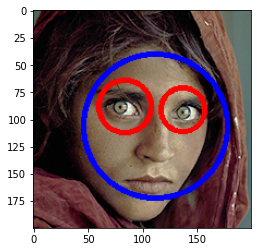

In [24]:
import cv2

# Load the face and eyes cascade classifiers
face_cascade = cv2.CascadeClassifier('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cv2/data/haarcascade_eye.xml')

# Load the input image and convert it to grayscale
img = cv2.imread('Graphics/face.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image using the face cascade classifier
faces = face_cascade.detectMultiScale(gray)

# Iterate through all the detected faces and draw circles and ellipses around them
for (x,y,w,h) in faces:
    center = (round(x + w/2), round(y + h/2))  # Calculate the center of the face
    radius = int(round((w + h)*0.25))  # Calculate the radius of the circle
    img = cv2.circle(img, center, radius, (255, 0, 0), 4)  # Draw a circle around the face
    faceROI = gray[y:y+h,x:x+w]  # Extract the region of interest corresponding to the face
    # Detect eyes in the face region of interest using the eyes cascade classifier
    eyes = eyes_cascade.detectMultiScale(faceROI)
    # Iterate through all the detected eyes and draw circles around them
    for (x2,y2,w2,h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)  # Calculate the center of the eye
        radius = int(round((w2 + h2)*0.25))  # Calculate the radius of the circle
        img = cv2.circle(img, eye_center, radius, (0, 0, 255), 4)  # Draw a circle around the eye

# Display the final image using cv2
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

